# Intégration numérique avec Julia, une introduction

## Introduction
Il nous faut tout d'abord importer les bons packages de Julia

In [31]:
# import Pkg; Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# import Pkg; Pkg.add("ODEInterfaceDiffEq")
using DifferentialEquations
using Plots

## Pendule simple
### Introduction
On s'intéresse ici au pendule simple. Les principes physiques de la mécanique classique donnent comme équation qui régit l'évolution du mouvement
$$ ml^2\ddot{\alpha}(t)+mlg\sin(\alpha(t)) + k\dot{\alpha}(t)=0,$$
où $\ddot{\alpha}(t)$ désigne la dérivée seconde de l'angle $\alpha$ par rapport au temps $t$. 

On prend ici comme variable d'état qui décrit le système $x(t)=(x_1(t),x_2(t))=(\alpha(t), \dot{\alpha}(t))$. Le système différentiel du premier ordre que l'on obtient s'écrit alors
$$
\left\{\begin{array}{l}
\dot{x}_1(t) = x_2(t)\\
\dot{x}_2(t) = -\frac{g}{l}\sin(x_1(t))-kx_2(t)\\
x_1(0) = x_{0,1}=\alpha_0\\
x_2(0) = x_{0,2}=\dot{\alpha}_0
\end{array}\right.
$$
### Cas où la fonction second membre renvoie xpoint

In [32]:
function pendule(x,p,t)
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
    g = p[1]; l = p[2]; k = p[3]
    xpoint = similar(x)
    xpoint[1] = x[2]
    xpoint[2] = -(g/l)*sin(x[1]) - k*x[2]
    return xpoint
end


pendule (generic function with 1 method)

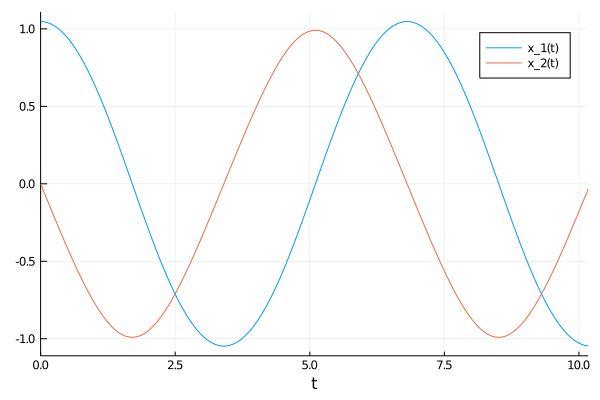

In [33]:
# Main
#
g = 9.81; l = 10; k = 0;
p = [g,l,k]      # constantes
theta0 = pi/3
t0 = 0.
tf = 3*pi*sqrt(l/g)*(1 + theta0^2/16 + theta0^4/3072) # 2*approximation de la période
tspan = (t0,tf)                                       # instant initial et terminal
x0 = [theta0,0]                                       # état initial
prob = ODEProblem(pendule,x0,tspan,p)                 # défini le problème en Julia
sol = solve(prob)                                     # réalise l'intégration numérique
plot(sol, label = ["x_1(t)" "x_2(t)"])  

### Cas où xpoint est le premier argument modifié de la fonction second membre

In [34]:
function pendule1!(xpoint,x,p,t)
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
    g = p[1]; l = p[2]; k = p[3]
    xpoint = similar(x)
    xpoint[1] = x[2]
    xpoint[2] = -(g/l)*sin(x[1]) - k*x[2]
    return nothing
end

pendule1! (generic function with 1 method)

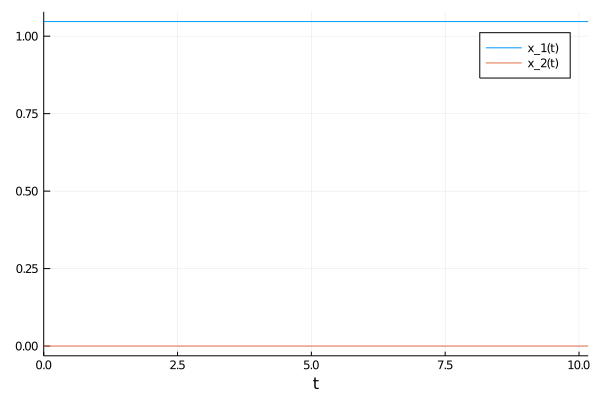

In [35]:
# Main
#
g = 9.81; l = 10; k = 0;
p = [g,l,k]      # constantes
theta0 = pi/3
t0 = 0.
tf = 3*pi*sqrt(l/g)*(1 + theta0^2/16 + theta0^4/3072) # 2*approximation de la période
tspan = (t0,tf)                                       # instant initial et terminal
x0 = [theta0,0]                                       # état initial
prob = ODEProblem(pendule1!,x0,tspan,p)                 # défini le problème en Julia
sol = solve(prob)                                     # réalise l'intégration numérique
plot(sol, label = ["x_1(t)" "x_2(t)"])  

L'instruction `xpoint = similar(x)` **crée une variable locale xpoint** et on a perdu le paramètre formel `xpoint`.

In [36]:
function pendule2!(xpoint,x,p,t)
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
    g = p[1]; l = p[2]; k = p[3]
    xpoint[1] = x[2]
    xpoint[2] = -(g/l)*sin(x[1]) - k*x[2]
    return nothing
end

pendule2! (generic function with 1 method)

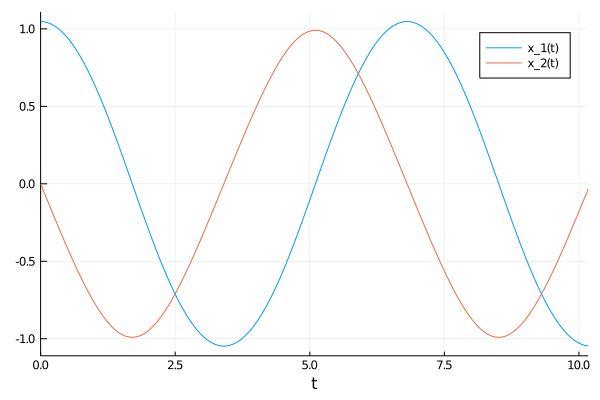

In [37]:
# Main
#
g = 9.81; l = 10; k = 0.;
p = [g,l,k]      # constantes
theta0 = pi/3
t0 = 0.
tf = 3*pi*sqrt(l/g)*(1 + theta0^2/16 + theta0^4/3072) # 2*approximation de la période
tspan = (t0,tf)                                       # instant initial et terminal
x0 = [theta0,0]                                       # état initial
prob = ODEProblem(pendule2!,x0,tspan,p)                 # défini le problème en Julia
sol = solve(prob)                                     # réalise l'intégration numérique
plot(sol, label = ["x_1(t)" "x_2(t)"])  

## Diagrammes de phases

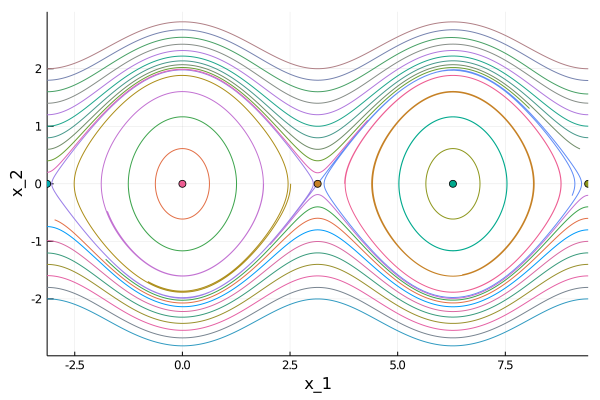

In [38]:
# Main
#
g = 9.81; l = 10; k = 0.;                                           # si k = 0.15 donc on a un amortissement
p = [g l k]
plot()
for theta0 in 0:(2*pi)/10:2*pi
    theta0_princ = theta0
    tf = 3*pi*sqrt(l/g)*(1 + theta0_princ^2/16 + theta0_princ^4/3072) # 2*approximation of the period
    tspan = (0.0,tf)
    x0 = [theta0 0]
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
theta0 = pi-10*eps()
x0 = [theta0 0]
tf = 70                                                                  # problem for tf=50 1/4 of the period!
tspan = (0.0,tf)
prob = ODEProblem(pendule,x0,tspan,p)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth

theta0 = pi+10*eps()
x0 = [theta0 0]
tf = 70
tspan = (0.0,tf)
prob = ODEProblem(pendule,x0,tspan,p)
sol = solve(prob)
plot!(sol,vars=(1,2), xlims = (-2*pi,4*pi), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth

# circulation case
for thetapoint0 in 0:0.2:2         
    tf = 10
    tspan = (0.,tf)
    x0 = [-pi thetapoint0]                # thetapoint0 > 0 so theta increases from -pi to ...
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
for thetapoint0 in -2:0.2:0
    tf = 10
    tspan = (0.,tf)
    x0 = [3*pi thetapoint0]              # thetapoint0 < 0 so theta decreases from 3pi to ...
    prob = ODEProblem(pendule,x0,tspan,p)
    sol = solve(prob)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)  # lw = linewidth
end
plot!([-pi 0 pi 2*pi 3*pi], [0 0 0 0 0], seriestype=:scatter)
plot!(xlims = (-pi,3*pi))


## Modèle de Van der Pol
### Exemple de cycle limite
L'équation différentielle considérée est l'équation de Van der Pol
$$(IVP)\left\{\begin{array}{l}
\dot{y}_1(t)=y_2(t)\\
\dot{y}_2(t)=(1-y_1^2(t))y_2(t)-y_1(t)\\
y_1(0)=2.00861986087484313650940188\\
y_2(0)=0
\end{array}\right.
$$
$t_f=T=6.6632868593231301896996820305$


La solution de ce problème de Cauchy est périodique de période $T$.

Résoudre et de visualiser la solution pour les points de départ :
- x0 = [2.00861986087484313650940188,0]
- [x01 , 0] pour x01 in -2:0.4:0
- [0 , x02] pour x02 in 2:1:4



In [39]:
function vdp(x,p,t)
# Van der Pol model
# second member of the IVP
# x : state
#     real(2)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
# To complete
#    xpoint    = similar(x)
#    xpoint[1] = x[2]
#    xpoint[2] = (1-x[1]^2)*x[2] - x[1]
    xpoint = [x[2] , (1-x[1]^2)*x[2] - x[1]]
    return xpoint
end

vdp (generic function with 1 method)

x0 = [2.0086198608748433, 0.0], p = [1], tspan = (0.0, 6.66328685932313)


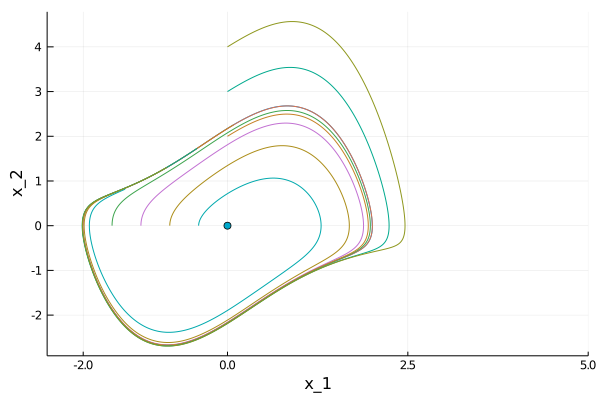

In [40]:
# Main
#
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
mu = 1
p = [mu]
t0 = 0.;
tspan = (t0,tf)
println("x0 = $x0, p = $p, tspan = $tspan")
prob = ODEProblem(vdp,x0,tspan,p)
sol = solve(prob)
plot(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)
for x01 in -2:0.4:0 #4.5:4.5
    x0 = [x01,0]
    prob = ODEProblem(vdp,x0,tspan,p)
    sol = solve(prob)#,force_dtmin=true)# 
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false) 
end
for x02 in 2:1:4
    x0 = [0.,x02]
    prob = ODEProblem(vdp,x0,tspan,p)
    sol = solve(prob)#solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
    plot!(sol,vars=(1,2), xlabel = "x_1", ylabel = "x_2", legend = false)
end
plot!([0], [0], seriestype=:scatter)        # point visualisation
plot!(xlims = (-2.5,5))
    



La solution périodique est ici ce qu'on appelle un **cycle limite**

# Modèle de Lorentz
## Chaos
$$(IVP)\left\{\begin{array}{l}
\dot{x}_1(t)=-\sigma x_1(t)+\sigma x_2(t)\\
\dot{x}_2(t)=-x_1(t)x_3(t)+rx_1(t)-x_2(t)\\
\dot{x}_3(t)=x_1(t)x_2(t)-bx_3(t)\\
x_1(0)=-8\\
x_2(0)=8\\
x_3(0)=r-1
\end{array}\right.
$$
avec $\sigma=10, r=28, b=8/3$.

Calculer et visualisé la solution de ce problème


In [41]:
function lorentz(x,p,t)
# Lorentz model
# second member of the IVP
# x : state
#     real(3)
# p : parameter vector
# t : time, variable not use here
#     real
# Output
# xpoint : vector of velocity
#          same as x
# To complete
    sigma = p[1]; rho = p[2]; beta = p[3];
    xpoint    = similar(x)
    xpoint[1] = sigma*(x[2]-x[1])
    xpoint[2] = x[1]*(rho-x[3]) - x[2]
    xpoint[3] = x[1]*x[2] - beta*x[3]
    return xpoint 
end

lorentz (generic function with 1 method)

In [42]:
# test de la fonction lorent!
sigma = 10.; rho = 28.; beta = 8/3;
p = [sigma rho beta]
#x0 = [1.1,0.0,0.0]
x0 = [-8, 8, rho-1]
xpoint = x0
xpoint = lorentz(x0,p,0)
println("xpoint = $xpoint")

xpoint = [160.0, -16.0, -136.0]


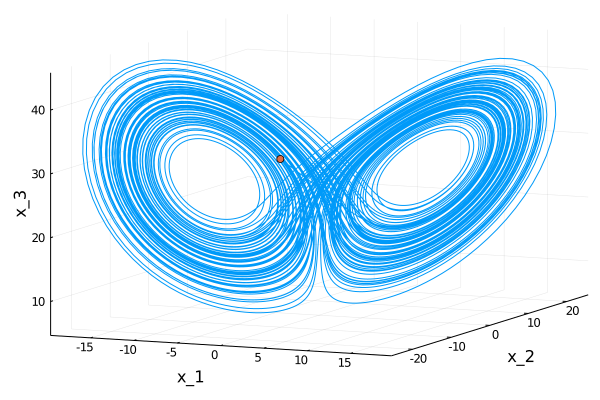

In [43]:
# Main
#
x0 = [-8, 8, rho-1]
tspan = (0.0,100.0)
prob = ODEProblem(lorentz,x0,tspan,p)
sol = solve(prob)
plot(sol,vars=(1,2,3), xlabel = "x_1", ylabel = "x_2", zlabel = "x_3", legend = false)
plot!([x0[1]], [x0[2]], [x0[3]], seriestype=:scatter)        # point visualisation
#annotate!([x0[1],x0[2],x0[3],text(". Point de départ", 10,:left)])

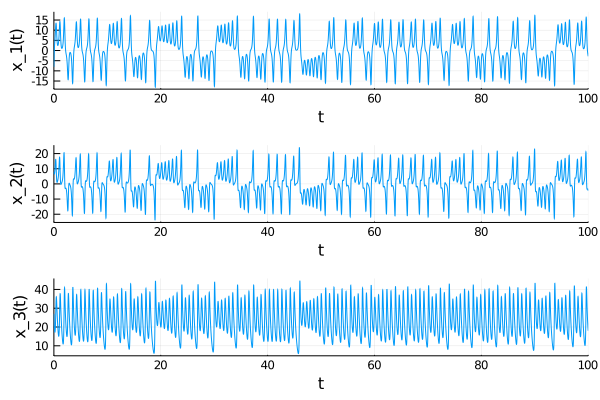

In [44]:
p1 = plot(sol,vars=(0,1),ylabel = "x_1(t)", legend = false)
p2 = plot(sol,vars=(0,2),ylabel = "x_2(t)", legend = false)
p3 = plot(sol,vars=(0,3),xlabel = "t", ylabel = "x_3(t)", legend = false)
plot(p1,p2,p3,layout=(3,1))#,legend=false)

## Attention à bien utiliser les codes
Nous allons ici résoudre le problème à valeur initiale
$$(IVP)\left\{\begin{array}{l}
\dot{x}_1(t)=x_1(t)+x_2(t)+\sin t\\
\dot{x}_2(t)=-x_1(t)+3x_2(t)\\
x_1(0)=-9/25\\
x_2(0)=-4/25,
\end{array}\right.
$$
dont la solution est
\begin{align*}
x_1(t)&= (-1/25)(13\sin t+9\cos t)\\
x_2(t)&= (-1/25)(3\sin t+4\cos t).
\end{align*}

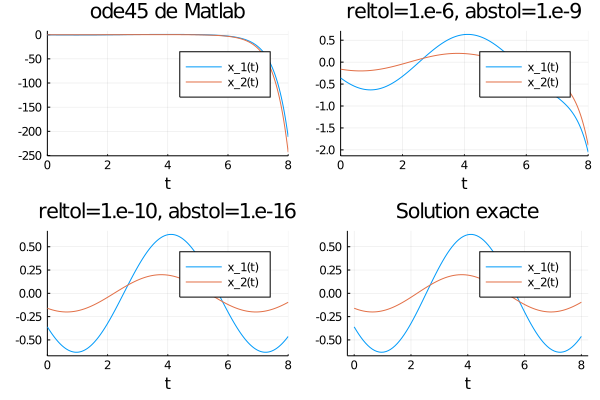

In [45]:
function exemple1(x,p,t)
# second member of the IVP
# Input
# x : state
#     real(2)
# p : parameter vector
# t : time
#     real
# Output
# xpoint : vector of velocity
#          same as x
    xpoint    = similar(x)                      # xpoint est un objet de même type que x
    xpoint[1] = x[1] + x[2] + sin(t)
    xpoint[2] = -x[1] + 3*x[2]          
#   xpoint = [x[1]+x[2]+sin(t), -x[1] + 3*x[2]]
    return xpoint 
end
p = []
t0 = 0.; tf = 8
tspan = (t0,tf)
x0 = [-9/25 , -4/25]
prob = ODEProblem(exemple1,x0,tspan,p)          # défini le problème en Julia
sol = solve(prob, DP5())                         # réalise l'intégration numérique
                                                 # avec ode45 de matlab
p1 = plot(sol, label = ["x_1(t)" "x_2(t)"], title = "ode45 de Matlab") #, lw = 0.5) # lw = linewidth
sol = solve(prob, DP5(), reltol = 1.e-6, abstol = 1.e-9)
p2 = plot(sol, label = ["x_1(t)" "x_2(t)"], title = "reltol=1.e-6, abstol=1.e-9") #, lw = 0.5)
sol = solve(prob, DP5(), reltol = 1.e-10, abstol = 1.e-15)
p3 = plot(sol, label = ["x_1(t)" "x_2(t)"], title = "reltol=1.e-10, abstol=1.e-16") #, lw = 0.5)
T = t0:(tf-t0)/100:tf
sinT = map(sin,T)                                # opération vectorielle
cosT = map(cos,T)
p4 = plot(T,[(-1/25)*(13*sinT+9*cosT) (-1/25)*(3*sinT+4*cosT)], label = ["x_1(t)" "x_2(t)"], xlabel = "t", title = "Solution exacte")
plot(p1,p2,p3,p4)
